# ARMA($p,q$) and ARIMA($p,d,q$)

In [1]:
import pandas as pd 
import numpy as np
%matplotlib inline

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
from statsmodels.tsa.arima_model import ARMA,ARIMA,ARMAResults,ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [6]:
from pmdarima import auto_arima

In [7]:
df1 = pd.read_csv('../../Data/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df1.index.freq = 'D'
df1 = df1[:120]

In [8]:
df2 = pd.read_csv('../../Data/TradeInventories.csv',index_col='Date',parse_dates=True)
df2.index.freq = 'MS'

## ARMA

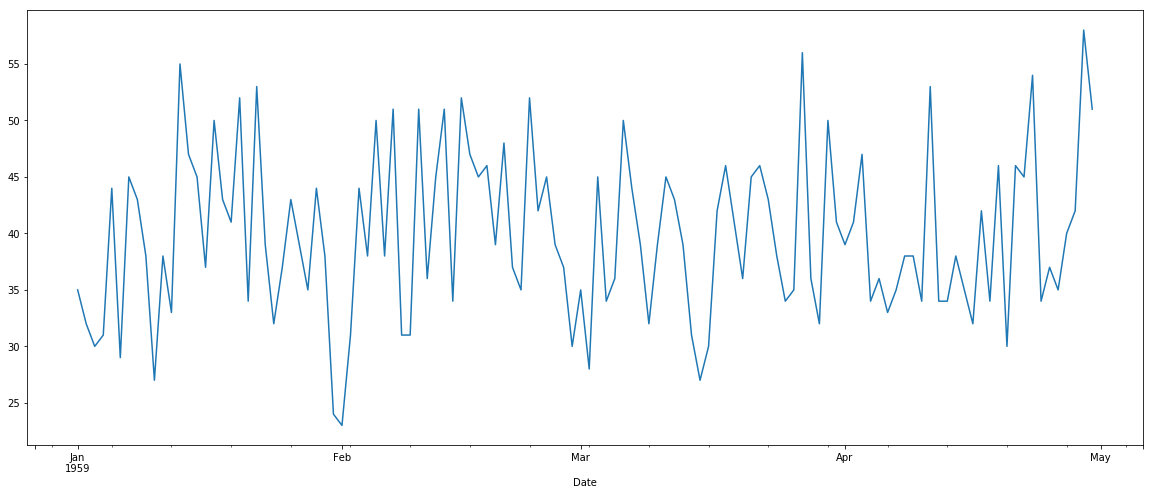

In [10]:
df1['Births'].plot(figsize=(20,8));

In [11]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [12]:
adf_test(df1['Births'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -9.855384e+00
p-value                 4.373545e-17
# lags used             0.000000e+00
# observations          1.190000e+02
critical value (1%)    -3.486535e+00
critical value (5%)    -2.886151e+00
critical value (10%)   -2.579896e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [17]:
auto_arima(df1['Births'],start_p=0,start_q=0,seasonal=False,trace=True).summary()

Fit ARIMA: order=(0, 0, 0); AIC=823.489, BIC=829.064, Fit time=0.004 seconds
Fit ARIMA: order=(1, 0, 0); AIC=824.647, BIC=833.010, Fit time=0.033 seconds
Fit ARIMA: order=(0, 0, 1); AIC=824.747, BIC=833.110, Fit time=0.034 seconds
Fit ARIMA: order=(1, 0, 1); AIC=826.399, BIC=837.549, Fit time=0.074 seconds
Total fit time: 0.147 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:                     ARMA(0, 0)   Log Likelihood                -409.745
Method:                           css   S.D. of innovations              7.357
Date:                Mon, 08 Jul 2019   AIC                            823.489
Time:                        11:15:49   BIC                            829.064
Sample:                             0   HQIC                           825.753
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.7833      0.672     59.240      0.000      38.467      41.100
==============================================================================
"""

In [18]:
train = df1.iloc[:90]
test = df1.iloc[90:]

In [45]:
model = ARMA(train['Births'].astype('float32'),order=(2,2))

In [46]:
results = model.fit()

In [47]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Births   No. Observations:                   90
Model:                     ARMA(2, 2)   Log Likelihood                -307.905
Method:                       css-mle   S.D. of innovations              7.405
Date:                Mon, 08 Jul 2019   AIC                            627.809
Time:                        11:22:34   BIC                            642.808
Sample:                    01-01-1959   HQIC                           633.858
                         - 03-31-1959                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           39.7549      0.912     43.607      0.000      37.968      41.542
ar.L1.Births    -0.1850      1.087     -0.170      0.865      -2.315       1.945
ar.L2.Births     0.4352      0.644      0.675      0.501      -0.828       1.698
ma.L1.Births     0.2777      1.097      0.253      0.801      -1.872       2.427
ma.L2.Births    -0.3999      0.679     -0.589      0.557      -1.730       0.930
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3181           +0.0000j            1.3181            0.5000
AR.2            1.7434           +0.0000j            1.7434            0.0000
MA.1           -1.2718           +0.0000j            1.2718            0.5000
MA.2            1.9662           +0.0000j            1.9662            0.0000
-----------------------------------------------------------------------------
"""

In [48]:
start = len(train)
end = len(train)+len(test)-1

In [49]:
predictions = results.predict(start,end).rename('ARMA (2,2) Predictions')

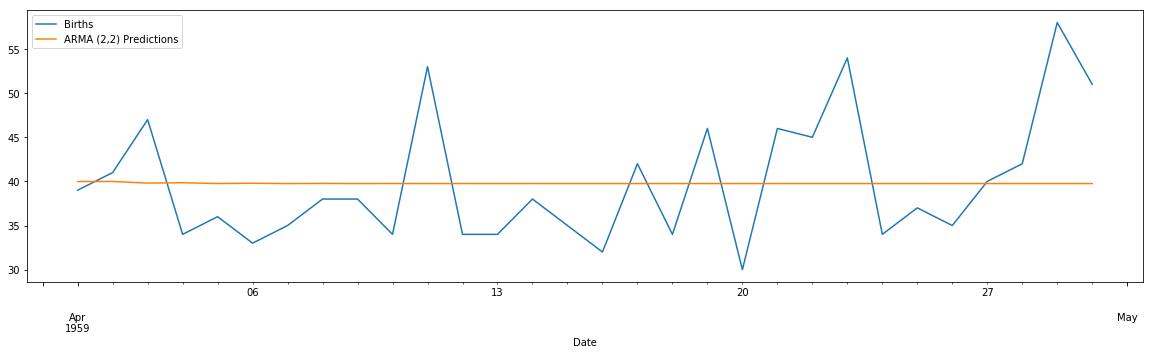

In [51]:
test['Births'].plot(figsize=(20,5),legend=True)
predictions.plot(legend = True)

In [55]:
abs(test.mean()-predictions.mean())

Births    0.0559
dtype: float64

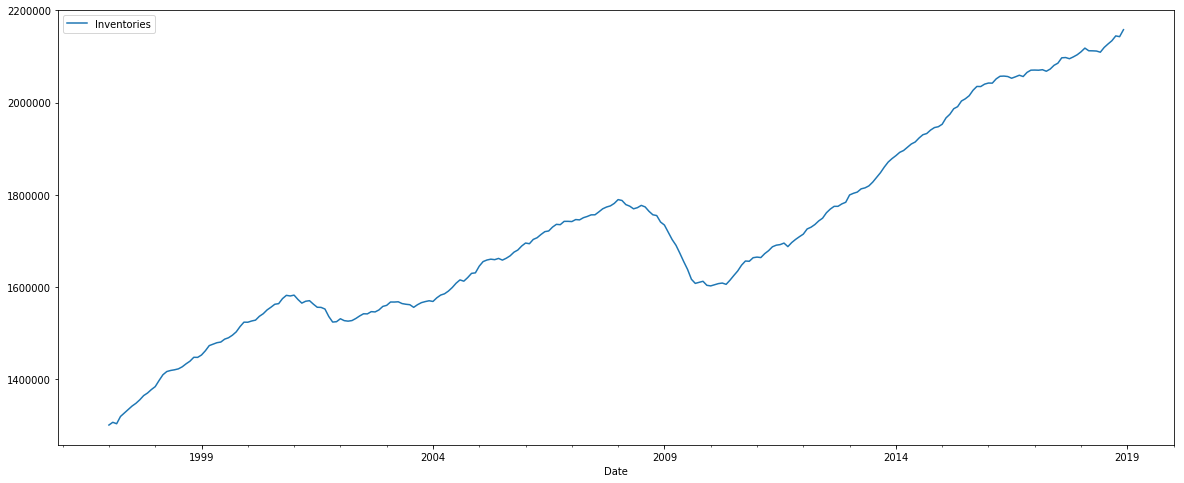

In [57]:
df2.plot(figsize=(20,8));

In [ ]:
from stats